## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson
from datetime import datetime
from collections import Counter
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

C:\Users\ander\AppData\Local\Temp\ipykernel_21340\2635600964.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
#defining functions
def anderson_test(data):
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, distribution is normal at this significance level' % (sl, cv))
        else:
            print('%.3f: %.3f, distributiom is not normal at this significance level' % (sl, cv))




In [4]:
#extracting data from the csv file
table = pd.read_csv('./data/flights_sample.csv')
table = table[['fl_date','arr_delay','dep_delay','weather_delay', 'dest_airport_id', 
               'taxi_in', 'taxi_out',]]
table = table.reset_index(drop=True)
table['fl_date'] = pd.to_datetime(table['fl_date'])
#table.to_csv('./table.csv', index=False)
table


,fl_date,arr_delay,dep_delay,weather_delay,dest_airport_id,taxi_in,taxi_out
0,2018-02-11,16.0,-4.0,0.0,11057,9.0,32.0
1,2019-03-01,12.0,0.0,NaN,12217,5.0,32.0
2,2018-12-14,1.0,-3.0,NaN,14107,12.0,10.0
3,2019-12-27,-15.0,-1.0,NaN,11433,6.0,15.0
4,2019-01-22,-10.0,7.0,NaN,12266,6.0,10.0
...,...,...,...,...,...,...,...
5039551,2019-08-08,-17.0,-2.0,NaN,14100,17.0,30.0
5039552,2018-01-30,-18.0,-2.0,NaN,14122,3.0,6.0
5039553,2019-03-18,-24.0,-3.0,NaN,11433,5.0,16.0
5039554,2018-03-12,168.0,166.0,0.0,11057,13.0,17.0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
message = pd.read_csv('./data/table.csv')
message = message[['fl_date','arr_delay','dep_delay']]
message = message.dropna()
message = message.reset_index(drop=True)

message

,fl_date,arr_delay,dep_delay
0,2018-02-11,16.0,-4.0
1,2019-03-01,12.0,0.0
2,2018-12-14,1.0,-3.0
3,2019-12-27,-15.0,-1.0
4,2019-01-22,-10.0,7.0
...,...,...,...
4939667,2019-08-08,-17.0,-2.0
4939668,2018-01-30,-18.0,-2.0
4939669,2019-03-18,-24.0,-3.0
4939670,2018-03-12,168.0,166.0


In [7]:
#testing balance of delays and early arrivals/depatures around 0
arr_pos = message['arr_delay'][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message['arr_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_pos = message['dep_delay'][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message['dep_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]

(arr_pos.count(), arr_neg.count(), dep_pos.count(), dep_neg.count())


(1699413, 3258387, 1797242, 3258387)

In [17]:
balance = pd.DataFrame({'arr_pos': arr_pos.count(), 'arr_neg': arr_neg.count()}, index=[0])

balance.to_csv('./data/balance.csv', index=False)

In [18]:
#Testing using anderson test 
arrivals = message['arr_delay'][(message.arr_delay >= -120) & (message.arr_delay <= 120)]
departures = message['dep_delay'][(message.dep_delay >= -120) & (message.dep_delay <= 120)]

print('Arrivals')
anderson_test(arrivals)
print('Departures')
anderson_test(departures)


Arrivals
Statistic: 101309.634
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level
Departures
Statistic: 73348.681
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level


Text(0.5, 1.0, 'Arrival distribution')

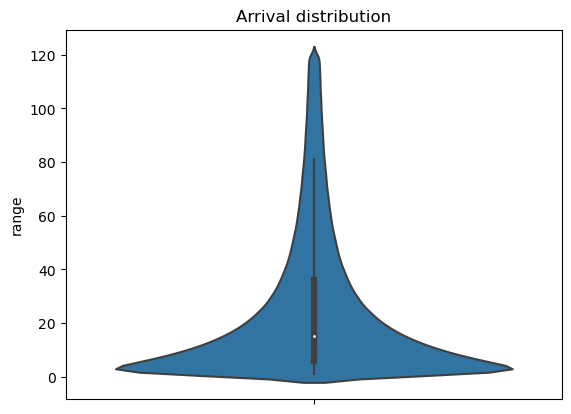

In [22]:
arr['range'] = pd.DataFrame(arrivals)
ax = sns.violinplot(y='range',data=arr)
ax.set_title('Arrival distribution')



In [9]:
#testting early arrivals/departures and delays separately
arr_pos = message['arr_delay'][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message['arr_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_pos = message['dep_delay'][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message['dep_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]

print('Early arrivals')
anderson_test(arr_neg)
print('Arrivals delay')
anderson_test(arr_pos)

print('Early departures')
anderson_test(dep_neg)
print(' Departures delay')
anderson_test(dep_pos)



Early arrivals
Statistic: 29311.303
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level
Arrivals delay
Statistic: 110563.207
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level
Early departures
Statistic: 39187.905
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level

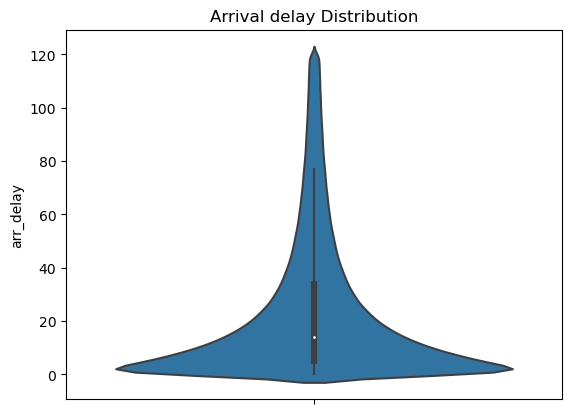

In [23]:
arr = pd.DataFrame(arr_pos)
ax = sns.violinplot(y='arr_delay',data=arr)
ax.set_title('Arrival delay Distribution')
plt.savefig('./image/arrival_dist.png')

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [11]:
message = pd.read_csv('./table.csv')
message = message[['fl_date','arr_delay','dep_delay']]
message = message.dropna()
message = message.reset_index(drop=True)

message

,fl_date,arr_delay,dep_delay
0,2018-02-11,16.0,-4.0
1,2019-03-01,12.0,0.0
2,2018-12-14,1.0,-3.0
3,2019-12-27,-15.0,-1.0
4,2019-01-22,-10.0,7.0
...,...,...,...
4939667,2019-08-08,-17.0,-2.0
4939668,2018-01-30,-18.0,-2.0
4939669,2019-03-18,-24.0,-3.0
4939670,2018-03-12,168.0,166.0


(array([17622., 17713., 17805., 17897., 17987., 18078., 18170.]),
 [Text(17622.0, 0, '2018-04'),
  Text(17713.0, 0, '2018-07'),
  Text(17805.0, 0, '2018-10'),
  Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10')])

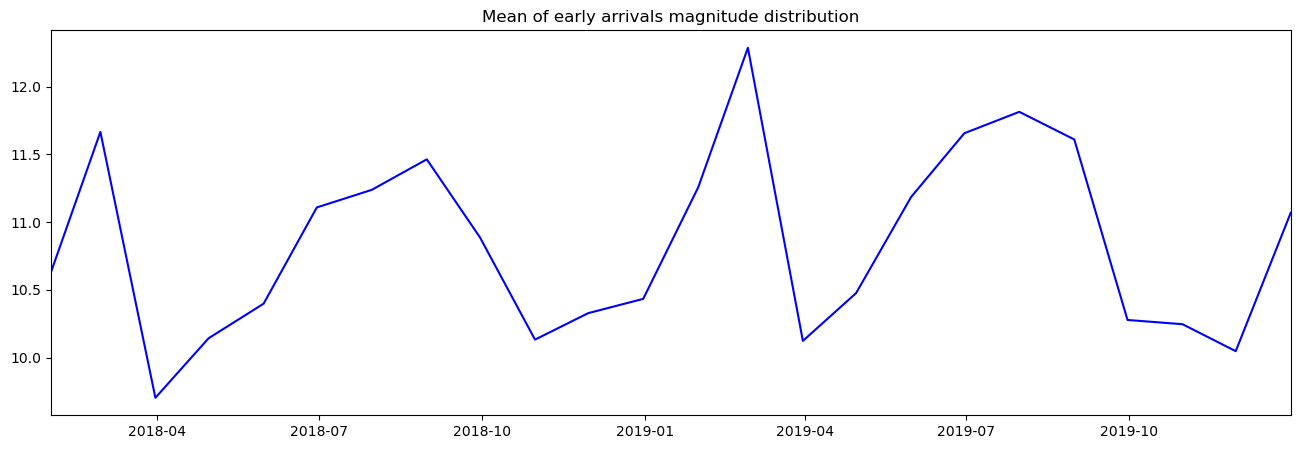

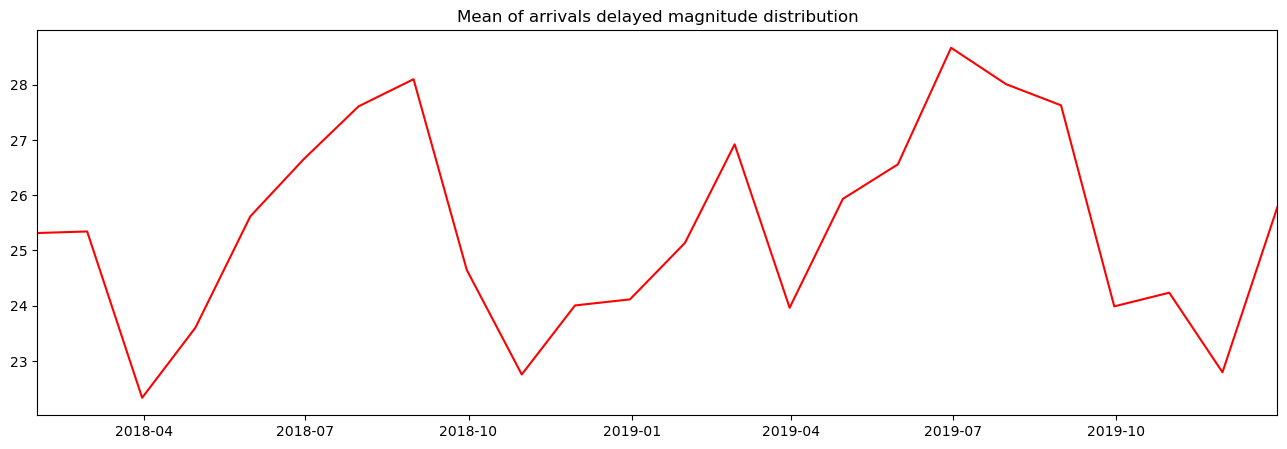

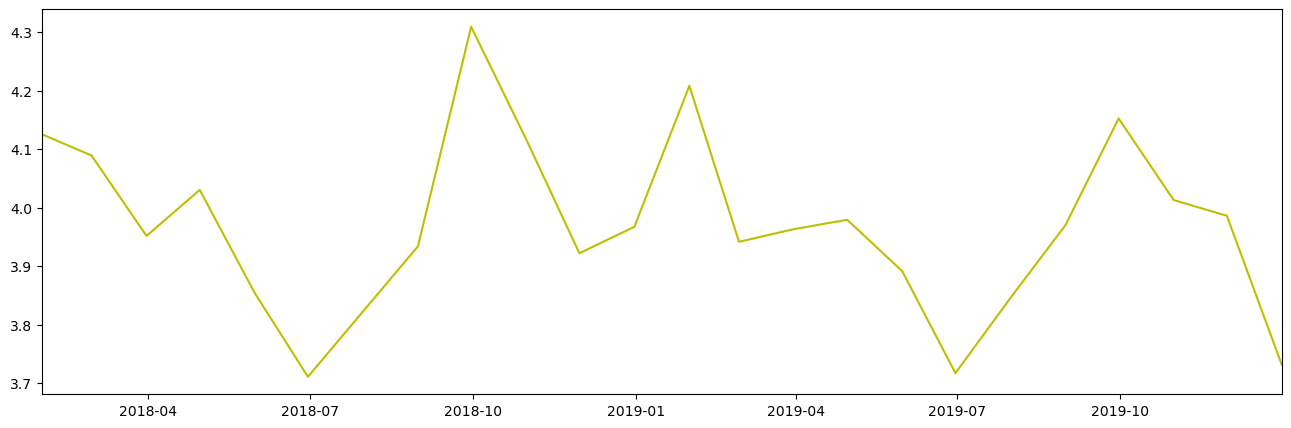

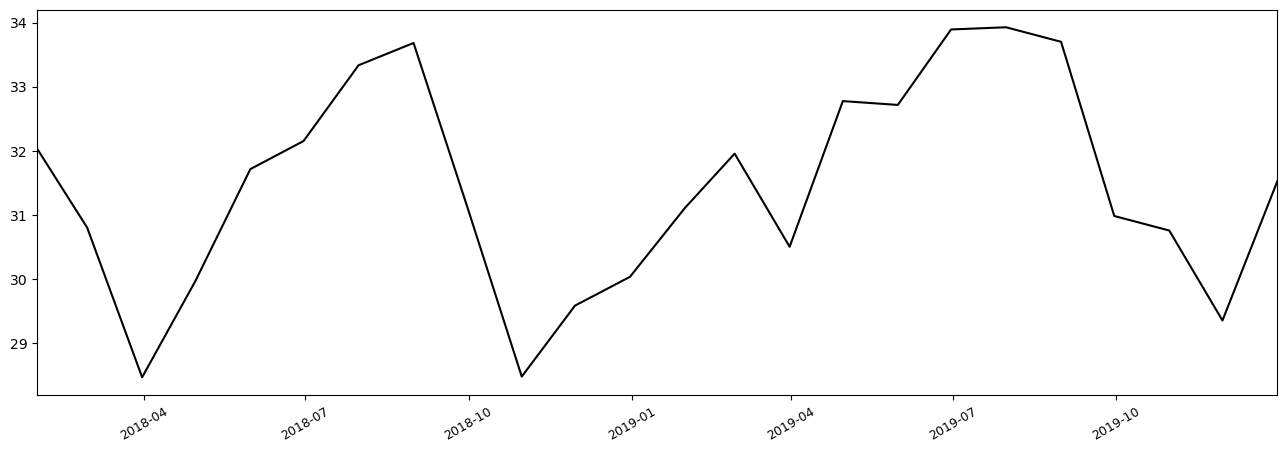

In [30]:
#average
message['fl_date'] = pd.to_datetime(message['fl_date'])
arr_pos = message[['fl_date','arr_delay']][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message[['fl_date','arr_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
arr_neg['arr_delay'] = arr_neg['arr_delay'].abs()
dep_pos = message[['fl_date','dep_delay']][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message[['fl_date','dep_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_neg['dep_delay'] = dep_neg['dep_delay'].abs()

agg_early_arr = arr_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_delay_arr = arr_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_early_dep = dep_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_delay_dep = dep_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()

fig = plt.subplots(figsize=(16, 5))
plt.title('Mean of early arrivals magnitude distribution')
plt.plot(agg_early_arr.index, agg_early_arr['arr_delay'], color='b')    
plt.xlim(agg_early_arr.index.min(), agg_early_arr.index.max())
plt.savefig('./image/early_arrival_dist.png')

fig = plt.subplots(figsize=(16, 5))
plt.title('Mean of arrivals delayed magnitude distribution')
plt.plot(agg_delay_arr.index, agg_delay_arr['arr_delay'], color='r')    
plt.xlim(agg_delay_arr.index.min(), agg_delay_arr.index.max())
plt.savefig('./image/delayed_arrival_dist.png')

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_early_dep.index, agg_early_dep['dep_delay'], color='y')    
plt.xlim(agg_early_dep.index.min(), agg_early_dep.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_delay_dep.index, agg_delay_dep['dep_delay'], color='k')    
plt.xlim(agg_delay_dep.index.min(), agg_delay_dep.index.max())

plt.xticks(rotation=30, fontsize=9)

(array([17622., 17713., 17805., 17897., 17987., 18078., 18170.]),
 [Text(17622.0, 0, '2018-04'),
  Text(17713.0, 0, '2018-07'),
  Text(17805.0, 0, '2018-10'),
  Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10')])

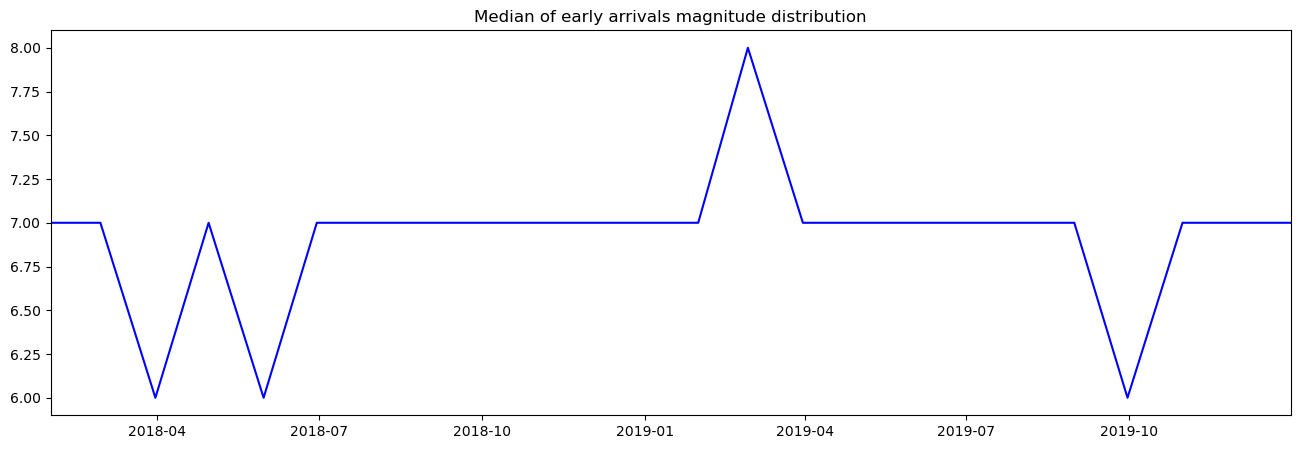

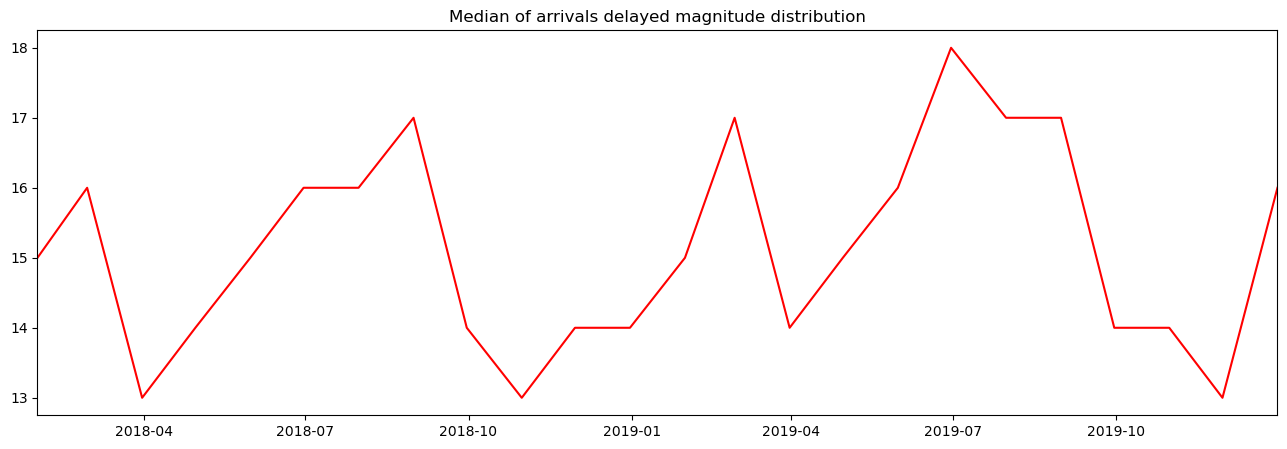

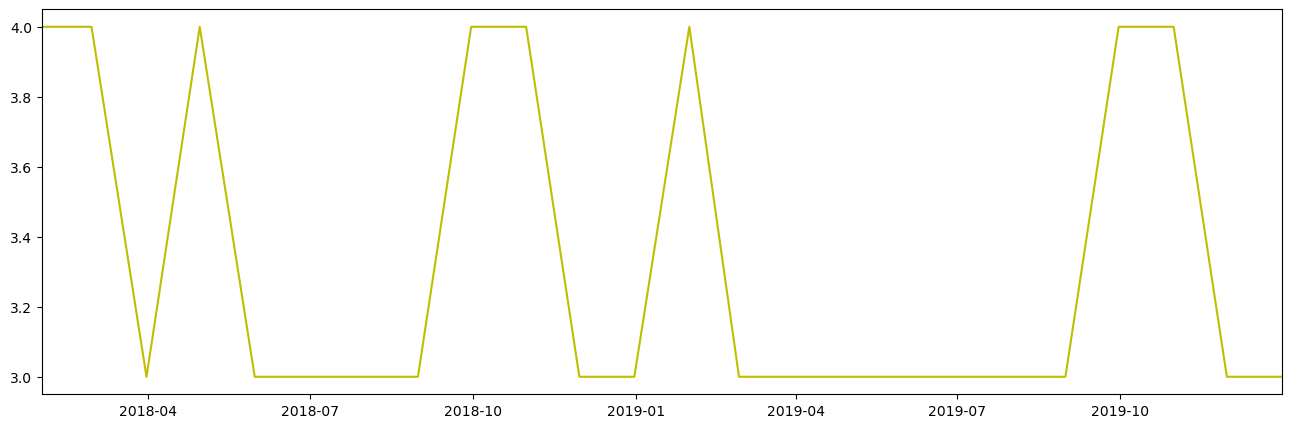

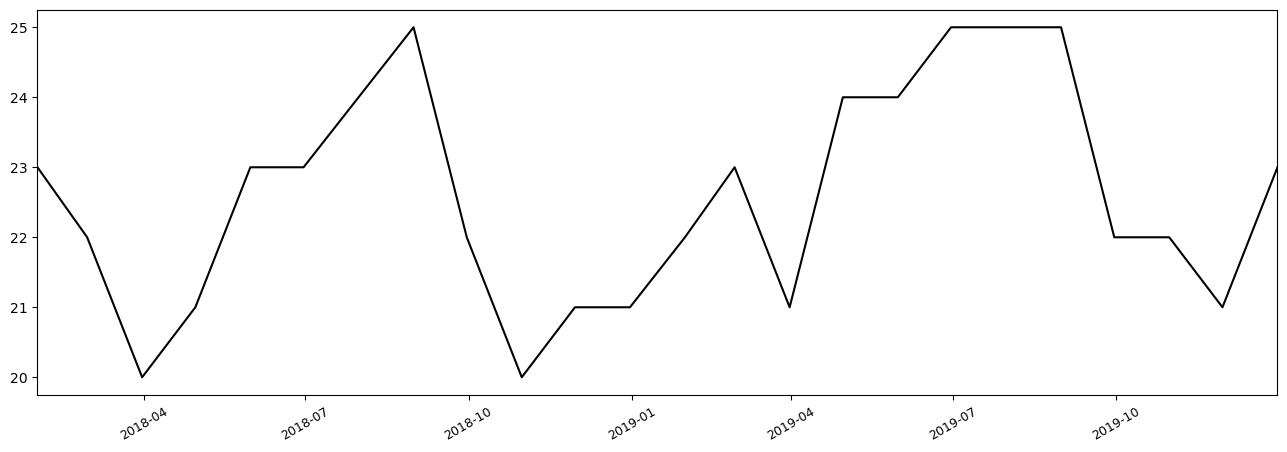

In [31]:
#median
arr_pos = message[['fl_date','arr_delay']][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message[['fl_date','arr_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
arr_neg['arr_delay'] = arr_neg['arr_delay'].abs()
dep_pos = message[['fl_date','dep_delay']][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message[['fl_date','dep_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_neg['dep_delay'] = dep_neg['dep_delay'].abs()

agg_early_arr = arr_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).median()
agg_delay_arr = arr_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).median()
agg_early_dep = dep_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).median()
agg_delay_dep = dep_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).median()

fig = plt.subplots(figsize=(16, 5))
plt.title('Median of early arrivals magnitude distribution')
plt.plot(agg_early_arr.index, agg_early_arr['arr_delay'], color='b')    
plt.xlim(agg_early_arr.index.min(), agg_early_arr.index.max())
plt.savefig('./image/early_arrival_med_dist.png')

fig = plt.subplots(figsize=(16, 5))
plt.title('Median of arrivals delayed magnitude distribution')
plt.plot(agg_delay_arr.index, agg_delay_arr['arr_delay'], color='r')    
plt.xlim(agg_delay_arr.index.min(), agg_delay_arr.index.max())
plt.savefig('./image/delayed_arrival_med_dist.png')

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_early_dep.index, agg_early_dep['dep_delay'], color='y')    
plt.xlim(agg_early_dep.index.min(), agg_early_dep.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_delay_dep.index, agg_delay_dep['dep_delay'], color='k')    
plt.xlim(agg_delay_dep.index.min(), agg_delay_dep.index.max())

plt.xticks(rotation=30, fontsize=9)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [9]:
#getting data
message = pd.read_csv('./data/table.csv')
message.dropna(subset=['arr_delay'])

#counting all flights that arrived late
message['weather_delay'] = message['weather_delay'].fillna(0)
message = message[message.arr_delay > 0]

#groupping by date
daily_num_flight_delay_arr = message.groupby('fl_date') \
                   .agg(total_count=('arr_delay', 'size')) \
                   .reset_index()

daily_num_flight_delay_arr

,fl_date,total_count
0,2018-01-01,2807
1,2018-01-02,3113
2,2018-01-03,2619
3,2018-01-04,1692
4,2018-01-05,2476
...,...,...
725,2019-12-27,2356
726,2019-12-28,2794
727,2019-12-29,2810
728,2019-12-30,2909


In [10]:
#counting all flights arrival delay due to weather
daily_num_weather_impact  = message[message.weather_delay != 0]

#groupping by date
daily_num_weather_impact = daily_num_weather_impact.groupby('fl_date') \
                            .agg(total_weather_impact = ('arr_delay', 'size')) \
                            .reset_index()
                            
daily_num_weather_impact

,fl_date,total_weather_impact
0,2018-01-01,100
1,2018-01-02,154
2,2018-01-03,86
3,2018-01-04,67
4,2018-01-05,129
...,...,...
725,2019-12-27,26
726,2019-12-28,162
727,2019-12-29,93
728,2019-12-30,156


In [11]:
#daily percentage of flights arrival delay due to weather
weather_impact = pd.merge(daily_num_flight_delay_arr, daily_num_weather_impact, on='fl_date', how='inner')
weather_impact['percent_weather_impact'] = (weather_impact['total_weather_impact'] / weather_impact['total_count'])*100

weather_impact.sort_values(by='percent_weather_impact', ascending=False)


,fl_date,total_count,total_weather_impact,percent_weather_impact
16,2018-01-17,2755,381,13.829401
495,2019-05-11,1859,201,10.812265
467,2019-04-13,1994,197,9.879639
523,2019-06-08,2455,239,9.735234
549,2019-07-04,1409,133,9.439319
...,...,...,...,...
482,2019-04-28,1901,7,0.368227
100,2018-04-11,1880,6,0.319149
118,2018-04-29,1730,5,0.289017
441,2019-03-18,1598,4,0.250313


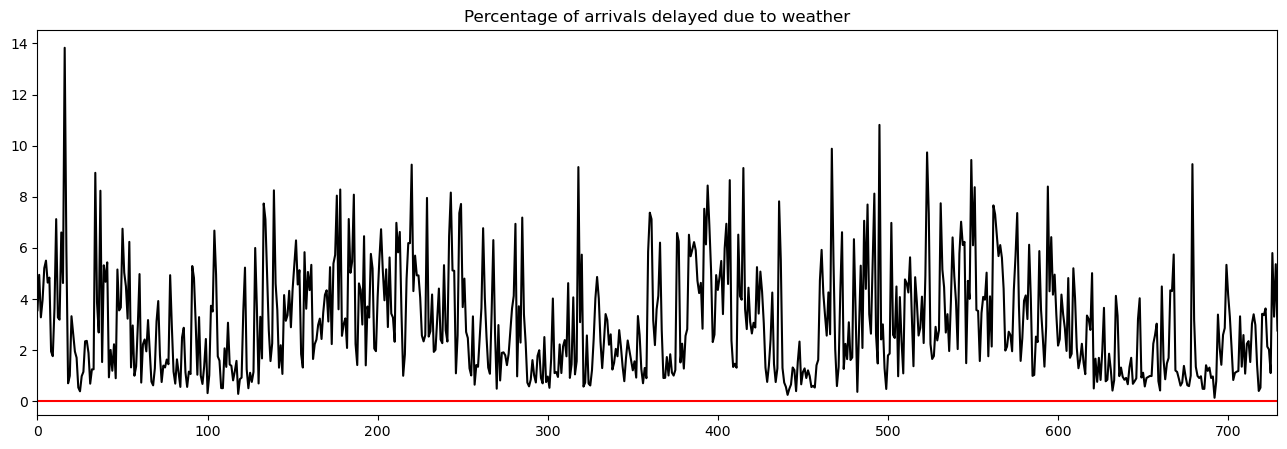

In [32]:
#ploting the percentage of flights arrival delay due to weather
fig = plt.subplots(figsize=(16, 5))
plt.title('Percentage of arrivals delayed due to weather')
plt.plot(weather_impact.index, weather_impact['percent_weather_impact'], color='k')    
plt.xlim(weather_impact.index.min(), weather_impact.index.max())
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('./image/weather_impact.png')
plt.show()

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [35]:
#extracting data
message = pd.read_csv('./data/table.csv')
message = message[['fl_date','dest_airport_id','taxi_in']]

#cleaning data
message = message.dropna(subset=['taxi_in']).reset_index(drop=True)

message

,fl_date,dest_airport_id,taxi_in
0,2018-02-11,11057,9.0
1,2019-03-01,12217,5.0
2,2018-12-14,14107,12.0
3,2019-12-27,11433,6.0
4,2019-01-22,12266,6.0
...,...,...,...
4950841,2019-08-08,14100,17.0
4950842,2018-01-30,14122,3.0
4950843,2019-03-18,11433,5.0
4950844,2018-03-12,11057,13.0


In [42]:
#choosing the top 5 airports with the most trafic
Counter(message['dest_airport_id']).most_common(2)


[(10397, 247191), (13930, 243361)]

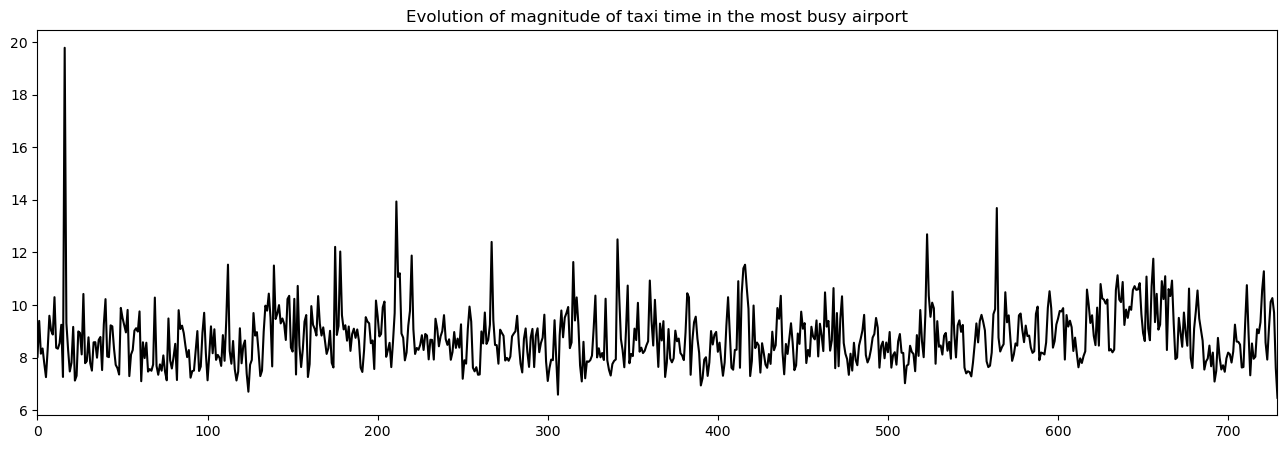

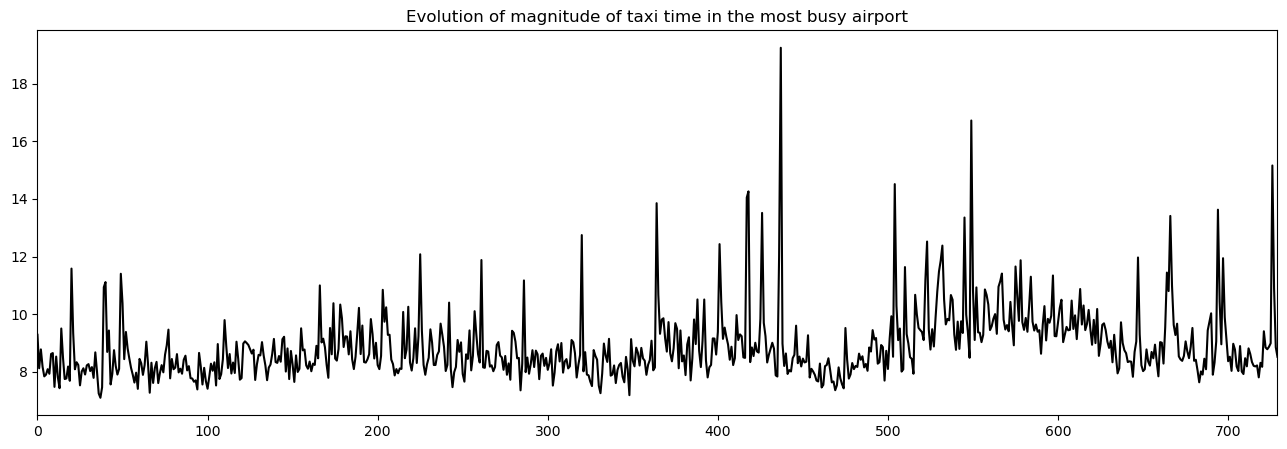

In [51]:
#ploting the evolution of the taxi time for the top 2 airports
list_airport = [10397, 11292]
c = 0
for i in list_airport:
    airport = message[message.dest_airport_id == i]
    airport = airport.groupby('fl_date') \
                .agg(fl_count=('taxi_in', 'size'), taxi_time_mean =('taxi_in', 'mean')) \
                .reset_index()

    fig = plt.subplots(figsize=(16, 5))
    plt.title('Evolution of magnitude of taxi time in the most busy airport')
    plt.plot(airport.index, airport['taxi_time_mean'], color='k')    
    plt.xlim(airport.index.min(), airport.index.max())
    if c == 0:
        plt.savefig('./image/taxiTime_busy.png')
        c =1

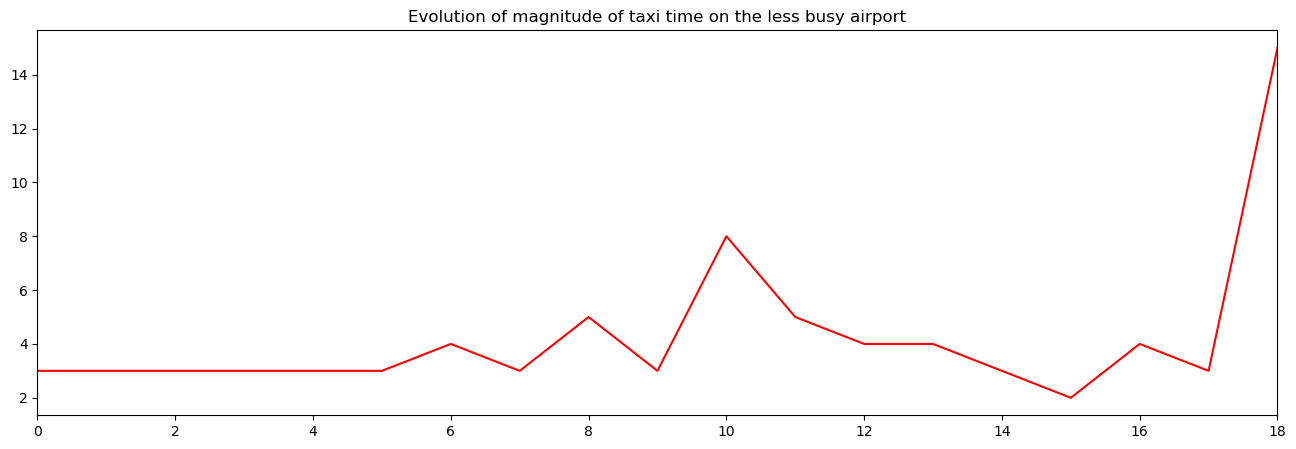

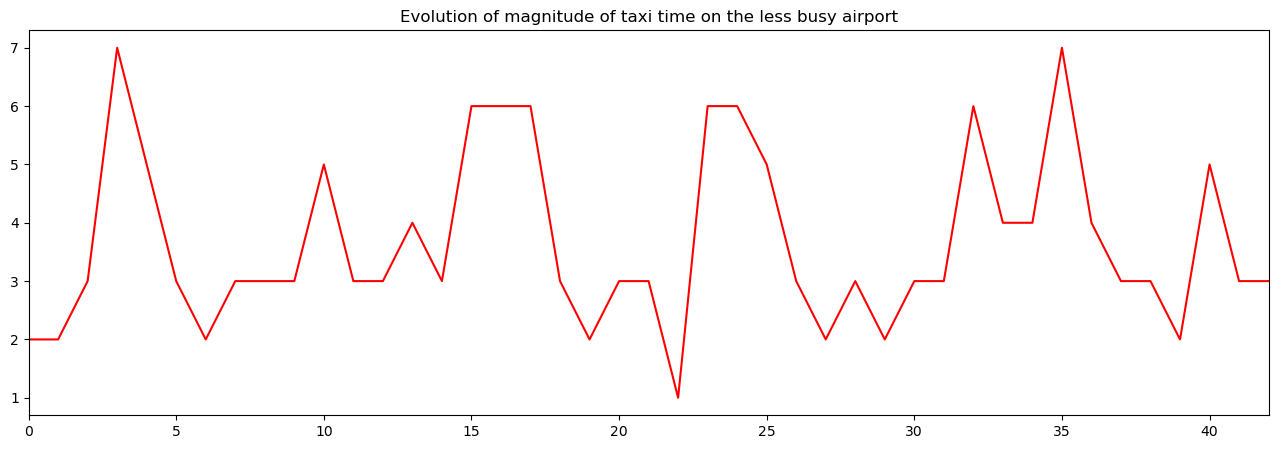

In [52]:
#ploting the evolution of the taxi time for the least 2 airports
list_airport = [10590, 10245]
c=0
for i in list_airport:
    airport = message[message.dest_airport_id == i]
    airport = airport.groupby('fl_date') \
                .agg(fl_count=('taxi_in', 'size'), taxi_time_mean =('taxi_in', 'mean')) \
                .reset_index()

    fig = plt.subplots(figsize=(16, 5))
    plt.title('Evolution of magnitude of taxi time on the less busy airport')
    plt.plot(airport.index, airport['taxi_time_mean'], color='r')    
    plt.xlim(airport.index.min(), airport.index.max())
    if c == 0:
        plt.savefig('./image/taxiTime_less.png')
        c =1

In [23]:
#checking the correlation between taxi time and trafic
count = 0
for i in set(message['dest_airport_id']):
    airport = message[message.dest_airport_id == i]
    airport = airport.groupby('fl_date') \
                .agg(fl_count=('taxi_in', 'size'), taxi_time_mean =('taxi_in', 'mean')) \
                .reset_index()
    result = pearsonr(airport['fl_count'], airport['taxi_time_mean'])
    if result[1] > 0.5:
        count += 1

print('percentage of airports where taxi time and trafic are correlated(alpha=0.5): ', count/len(set(message['dest_airport_id']))*100, '%')



percentage of airports where taxi time and trafic are correlated(alpha=0.5):  36.53333333333333 %


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [24]:
#extracting data
message = pd.read_csv('./table.csv')

total = message[message.arr_delay >= 0]

arr_dep = total[total.dep_delay > 0]
print('percentenage of arrival delays caused by departure delays: ', (len(arr_dep)/len(total))*100)

arr_compensated = arr_dep[arr_dep.dep_delay > arr_dep.arr_delay]
print('percentenage of arrival delays caused by departure delays and compensated during flight: ', (len(arr_compensated)/len(arr_dep))*100)                                                                           

arr_compensated['percentage'] = (arr_compensated['dep_delay'] - arr_compensated['arr_delay'])/arr_compensated['dep_delay'] 
print('average percentage of departure delays time compensated: ', arr_compensated['percentage'].mean()*100)



percentenage of arrival delays caused by departure delays:  69.33728017859292
percentenage of arrival delays caused by departure delays and compensated during flight:  60.55639816859241
average percentage of departure delays time compensated:  35.429450179304695
